# Course: Data Analysis

# Topic 2: Investigating relationships between variables (part 1)

* [1. Contingency Tables](#chapter1)
* [2. Chi-squared statistical test](#chapter2)
* [3. Normality Tests](#chapter3)
* [4. Pairwise Correlation](#chapter4)
* [5. Partial Correlation](#chapter5) 
* [6. Visualization of Correlations](#chapter6)

In [1]:
# !pip install pingouin
import pandas as pd
from scipy import stats
import pingouin as pg
from scipy.stats import norm, pointbiserialr
import seaborn as sns
import numpy as np
from math import sqrt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

List of variables:

- Business environment
- Business sophistication index
- Citable documents H-index
- Creative goods and services
- Creative goods exports, % total trade
- Creative outputs index
- Cultural and creative services exports, % total trade
- Domestic market scale, bn PPP in dollars
- Ease of getting credit
- Ease of starting a business
- Ecological sustainability
- Expenditure on education, % GDP
- Firms offering formal training, %
- General infrastructure
- Global Innovation Index
- Government effectiveness
- Government's online service
- Graduates in science and engineering, %
- Gross expenditure on R&D, % GDP
- High-tech exports, % total trade
- High-tech imports, % total trade
- High-tech manufacturing, %
- Human capital and research index
- Information and Communications Technology access
- Information and Communications Technology services exports, % total trade
- Information and Communications Technology services imports, % total trade
- Information and Communications Technology use
- Infrastructure index
- Intangible assets
- Joint venture/strategic alliance deals/bn PPP$ GDP
- Knowledge absorption
- Knowledge and technology outputs index
- Knowledge workers
- Knowledge-intensive employment, %
- Logistics performance
- Market sophistication index
- Mobile app creation/bn PPP in dollars GDP
- Online creativity
- PISA scales in reading, maths and science
- Political and operational stability
- Political environment
- Pupil-teacher ratio, secondary
- QS university ranking average score of top 3 universities
- Research and development (R&D)
- Scientific and technical articles/bn PPP in dollars GDP
- Software spending, % GDP
- Tertiary education
- Tertiary enrolment, % gross
- University-industry R&D collaboration
- Region
- Euro area
- European Union
- OECD members
- Least developed countries
- Income

In [2]:
df = pd.read_excel('WIPO-GII.xlsx')
df

,Country,Business environment_2020,Business environment_2021,Business environment_2022,Business sophistication index_2020,Business sophistication index_2021,Business sophistication index_2022,Citable documents H-index_2020,Citable documents H-index_2021,Citable documents H-index_2022,...,University-industry R&D collaboration_2021,University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,Cote d'Ivoire,70.8,70.8,48.3,19.7,20.9,21.8,6.3,6.1,5.1,...,38.1,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0
1,Czechia,81.1,81.1,42.1,46.2,43.5,46.2,29.8,30.3,30.4,...,53.7,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1
2,"Egypt, Arab Rep.",65.0,65.0,45.0,18.7,18.0,20.4,17.4,17.7,18.0,...,44.3,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
3,"Hong Kong SAR, China",81.9,81.9,69.7,45.4,45.2,46.7,36.5,37.3,38.4,...,61.3,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1
4,"Iran, Islamic Rep.",51.4,51.4,13.3,17.9,16.5,18.6,19.7,20.5,22.1,...,26.7,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Paraguay,59.0,59.0,28.8,22.2,25.4,23.1,4.2,4.0,3.2,...,24.5,26.8,Latin America & Caribbean,Americas,0,0,0,0,middle income,0
135,Peru,64.3,64.3,50.4,33.8,34.3,32.1,13.8,14.3,14.4,...,31.4,32.7,Latin America & Caribbean,Americas,0,0,0,0,middle income,0
136,Trinidad and Tobago,68.5,68.5,47.6,18.0,18.3,20.5,5.0,4.9,4.0,...,33.3,33.6,Latin America & Caribbean,Americas,0,0,0,0,high income,1
137,United States,91.0,91.0,75.3,62.8,63.0,64.5,100.0,100.0,100.0,...,74.4,79.6,North America,Americas,0,0,1,0,high income,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Columns: 156 entries, Country to High income
dtypes: float64(147), int64(5), object(4)
memory usage: 169.5+ KB


## 1. Contingency Tables <a class="anchor" id="chapter1"></a>

More information [here](https://pbpython.com/pandas-crosstab.html).

In [4]:
df.groupby('Income')['Region2'].value_counts().unstack()  # cells contain frequencies

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,7.0,7.0,31.0,7.0,NaN
low income,NaN,1.0,1.0,NaN,13.0
middle income,15.0,19.0,13.0,8.0,17.0


In [5]:
df.groupby('OECD members')['European Union'].value_counts(normalize=True).unstack()  # cells contain percentages

European Union,0,1
OECD members,,
0,0.950495,0.049505
1,0.421053,0.578947


In [6]:
pd.crosstab(df['Income'], df['Region2'])

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,7,7,31,7,0
low income,0,1,1,0,13
middle income,15,19,13,8,17


In [7]:
pd.crosstab(df['Income'], df['Region2'], margins=True)  # sums by rows and columns

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,All
Income,,,,,,
high income,7,7,31,7,0,52
low income,0,1,1,0,13,15
middle income,15,19,13,8,17,72
All,22,27,45,15,30,139


In [8]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total')  # Total instead of All

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,7,7,31,7,0,52
low income,0,1,1,0,13,15
middle income,15,19,13,8,17,72
Total,22,27,45,15,30,139


In [9]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize=True) 
# percentages instead of frequencies

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.050360,0.050360,0.223022,0.050360,0.000000,0.374101
low income,0.000000,0.007194,0.007194,0.000000,0.093525,0.107914
middle income,0.107914,0.136691,0.093525,0.057554,0.122302,0.517986
Total,0.158273,0.194245,0.323741,0.107914,0.215827,1.000000


We can conclude that 52% of countries belong to middle income group. 22% of countries are in the Sub-Saharan Africa Region. 22% of countries are high-income countries in Europe.

In [10]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize='columns')
# the sum of values in each column is 1

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.318182,0.259259,0.688889,0.466667,0.000000,0.374101
low income,0.000000,0.037037,0.022222,0.000000,0.433333,0.107914
middle income,0.681818,0.703704,0.288889,0.533333,0.566667,0.517986


Based on these data we can see the proportion of high, middle and low income countries in each region. In Europe  69% of countries belong to the high income group. In Sub-Saharan Africa 57% of countries belong to the middle income group.

In [11]:
pd.crosstab(df['Region2'], df['Income'], margins=True, margins_name='Total', normalize='columns')
# the sum of values in each column is 1, but we change the position of variables

Income,high income,low income,middle income,Total
Region2,,,,
Americas,0.134615,0.000000,0.208333,0.158273
Asia-Pacific,0.134615,0.066667,0.263889,0.194245
Europe,0.596154,0.066667,0.180556,0.323741
Middle East and North Africa,0.134615,0.000000,0.111111,0.107914
Sub-Saharan Africa,0.000000,0.866667,0.236111,0.215827


Based on these data we can see the proportion of countries from different regions in each income group. In the high income group 60% of countries are located in Europe. In the low income group 87% of countries are located in Sub-Saharan Africa. In the middle income group 26% of countries are located in Asia-Pacific.

In [12]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize='index')
# we don't change the position of variables, but calculate row percentages to get the same results

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,0.134615,0.134615,0.596154,0.134615,0.000000
low income,0.000000,0.066667,0.066667,0.000000,0.866667
middle income,0.208333,0.263889,0.180556,0.111111,0.236111
Total,0.158273,0.194245,0.323741,0.107914,0.215827


<Axes: xlabel='Income'>

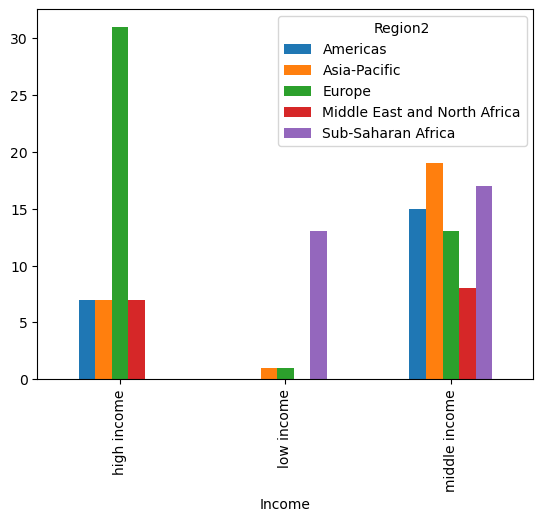

In [13]:
df.groupby('Income')['Region2'].value_counts().unstack().plot(kind='bar')
# clustered bar chart based of frequencies

<Axes: xlabel='Income'>

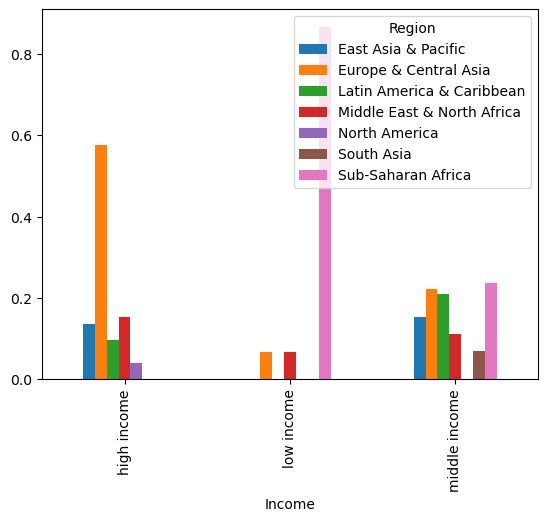

In [14]:
df.groupby('Income')['Region'].value_counts(normalize=True).unstack().plot(kind='bar')
#clustered bar chart based of percentages

<Axes: xlabel='Region2'>

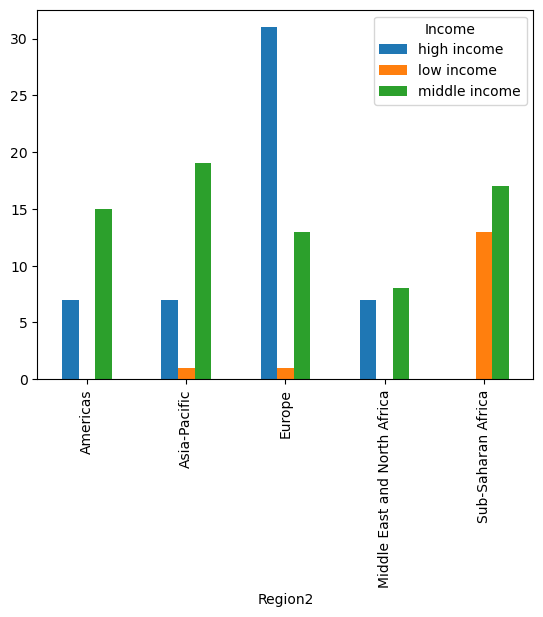

In [15]:
df.groupby('Region2')['Income'].value_counts().unstack().plot(kind='bar')
# grouping and main variable swapped

<Axes: xlabel='Region2'>

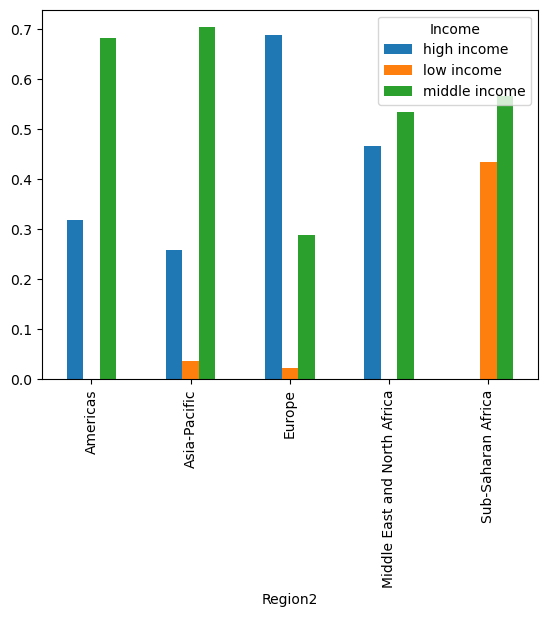

In [16]:
df.groupby('Region2')['Income'].value_counts(normalize=True).unstack().plot(kind='bar')

## 2. Chi-squared statistical test <a class="anchor" id="chapter2"></a>

**Income and OECD members**

In [17]:
ct_income_oecd = pd.crosstab(df['Income'], df['OECD members'])
ct_income_oecd

OECD members,0,1
Income,,
high income,18,34
low income,15,0
middle income,68,4


In [18]:
stats.chi2_contingency(ct_income_oecd)

Chi2ContingencyResult(statistic=60.73430116290981, pvalue=6.482075293679408e-14, dof=2, expected_freq=array([[37.78417266, 14.21582734],
       [10.89928058,  4.10071942],
       [52.31654676, 19.68345324]]))

chi2 = 60.73430116290981

p-value = 6.482075293679408e-14

array - contains expected frequencies (we have only one value below 5)

In [19]:
print('chi2 = ', stats.chi2_contingency(ct_income_oecd)[0], '   p-value =', stats.chi2_contingency(ct_income_oecd)[1])

chi2 =  60.73430116290981    p-value = 6.482075293679408e-14


## Conclusions

H1: there is a relationship between the region where the country is located and it's membership in OECD

H0: there is no relationship between the region where the country is located and it's membership in OECD

p-value < 0.05

p-value < 0.01

H1 is accepted both at 5% and at 1% level of significance, H0 is rejected.

**Business environment_2022 and Region**

In [20]:
ct_be_region = pd.crosstab(df['Business environment_2022'], df['Region'])
ct_be_region

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Business environment_2022,,,,,,,
0.0,0,0,0,1,0,0,1
0.8,0,1,0,0,0,0,0
13.3,0,0,0,1,0,0,0
14.5,0,0,1,0,0,0,0
17.9,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
82.1,1,0,0,0,0,0,0
85.8,0,1,0,0,0,0,0
86.8,0,1,0,0,0,0,0


In [21]:
stats.chi2_contingency(ct_be_region)

Chi2ContingencyResult(statistic=729.1177756918371, pvalue=0.23197988655562385, dof=702, expected_freq=array([[0.25757576, 0.71212121, 0.27272727, 0.24242424, 0.03030303,
        0.07575758, 0.40909091],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.25757576, 0.71212121, 0.27272727, 0.24242424, 0.03030303,
        0.07575758, 0.

Please note that here the Chi-squared statistical test in this case is __not applicable__. We dont't have enough frequencies in each cell of the contingency table to make conclusions about the relationship of the variables. 

## 3. Normality Tests <a class="anchor" id="chapter3"></a>

### Shapiro-Wilk normality test

**Information and Communications Technology services exports, % total trade_2022**

In [22]:
stats.shapiro(df['Information and Communications Technology services exports, % total trade_2022'].dropna())

ShapiroResult(statistic=0.758993923664093, pvalue=1.917957437834461e-13)

H1: The distribution of UInformation and Communications Technology services exports, % total trade in 2022 variable is different from the normal distribution

H0: The distribution of Information and Communications Technology services exports, % total trade in 2022 variable is not different from the normal distribution

Conclusion: as p-value < 0.05, H1 is accepted => the distribution is significantly different from normal

<Axes: xlabel='Information and Communications Technology services exports, % total trade_2022', ylabel='Density'>

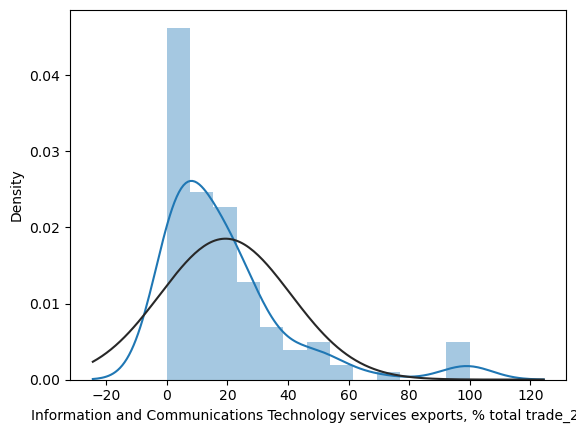

In [23]:
sns.distplot(df['Information and Communications Technology services exports, % total trade_2022'].dropna(), fit=norm) 

In addition to plotting distribution of the variable, we can use Quantile-Quantile (Q-Q) plot to estimate the deviation of the original data from the theoretical (normal, in this case) distribution

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

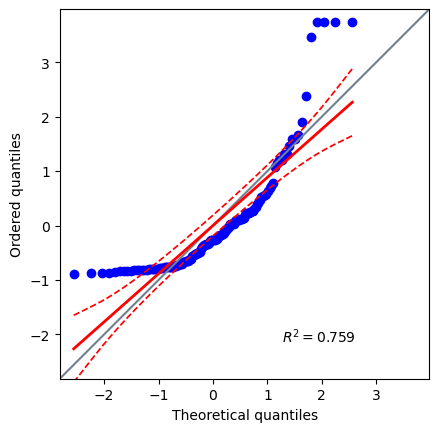

In [24]:
pg.qqplot(df['Information and Communications Technology services exports, % total trade_2022'], dist = 'norm')

On the graph above we can see that quantiles in our data are noticeably different from the distribution of quantiles of the normal distribution. R^2 is the coefficient of determination that measures the goodness of fit of the linear model (the red line) to our data and hense, estimated, how good can the given relation be approximated by linear function. The better linear model fits the data, the more similar are two distributions (in this case, it means that the empirical distribution is close to normal distribution).This is further suppoted by the histogram and statistical test above.

### ! But for sample size greater than 50 it's more suitable to run the Kolmogorov-Smirnov normality test

### Kolmogorov-Smirnov normality test

**University-industry R&D collaboration_2022**

In [25]:
stats.kstest(df['University-industry R&D collaboration_2022'].dropna(), 
             'norm', args=(df['University-industry R&D collaboration_2022'].dropna().mean(), 
                           df['University-industry R&D collaboration_2022'].dropna().std()))

KstestResult(statistic=0.06285755871505036, pvalue=0.6505715098926618, statistic_location=29.0, statistic_sign=-1)

H1: The distribution of University-industry R&D collaboration in 2022 variable is different from the normal distribution

H0: The distribution of University-industry R&D collaboration in 2022 variable is not different from the normal distribution

Conclusion: as p-value > 0.05, H1 is rejected, H0 is not rejected => the distribution is not significantly different from normal

<Axes: xlabel='University-industry R&D collaboration_2022', ylabel='Density'>

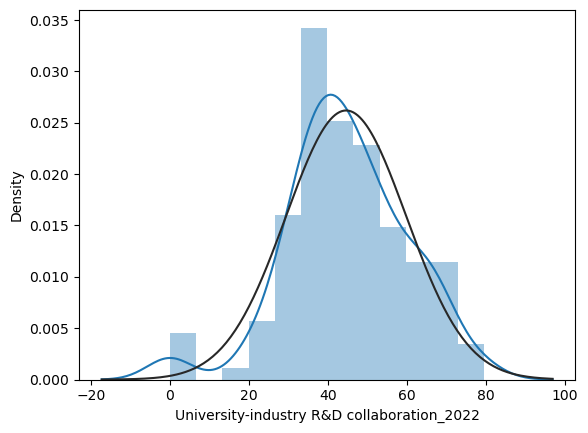

In [26]:
sns.distplot(df['University-industry R&D collaboration_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

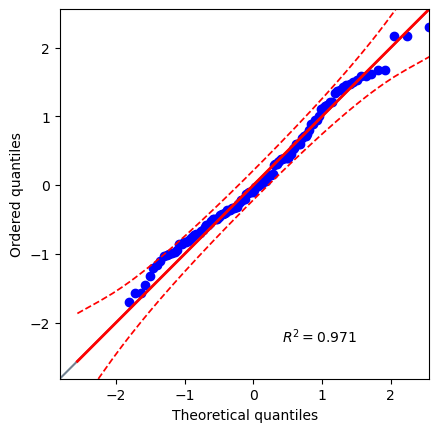

In [27]:
pg.qqplot(df['University-industry R&D collaboration_2022'], dist = 'norm')

**Information and Communications Technology use_2022**

In [28]:
stats.kstest(df['Information and Communications Technology use_2022'].dropna(), 
             'norm', args=(df['Information and Communications Technology use_2022'].dropna().mean(), 
                           df['Information and Communications Technology use_2022'].dropna().std()))

KstestResult(statistic=0.13715514990599909, pvalue=0.01255647340989818, statistic_location=71.0, statistic_sign=-1)

<Axes: xlabel='Information and Communications Technology use_2022', ylabel='Density'>

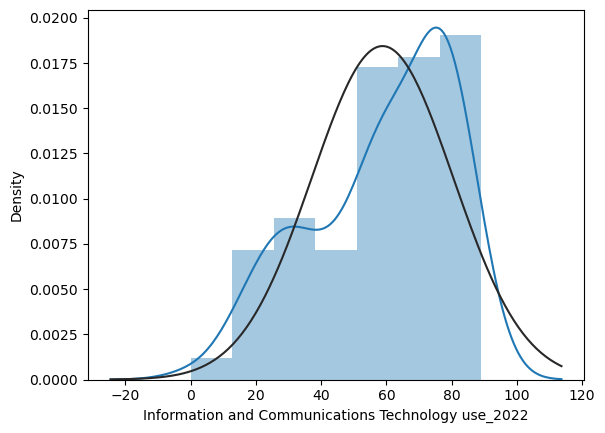

In [29]:
sns.distplot(df['Information and Communications Technology use_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

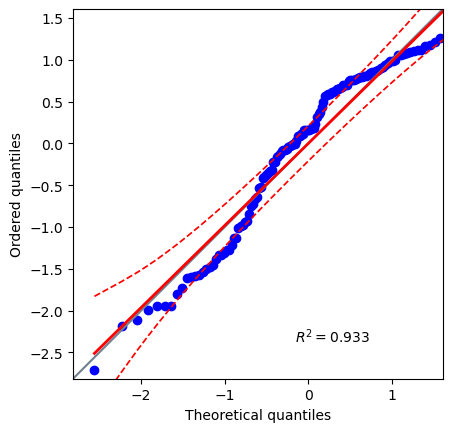

In [30]:
pg.qqplot(df['Information and Communications Technology use_2022'], dist = 'norm')

_Conclusion: the distribution of Information and Communications Technology use_2022 is different from normal_

**High-tech manufacturing, %_2022**

In [31]:
stats.kstest(df['High-tech manufacturing, %_2022'].dropna(), 'norm', 
             args=(df['High-tech manufacturing, %_2022'].dropna().mean(), 
                   df['High-tech manufacturing, %_2022'].dropna().std()))

KstestResult(statistic=0.1286546983117936, pvalue=0.02301697134158888, statistic_location=0.0, statistic_sign=-1)

<Axes: xlabel='High-tech manufacturing, %_2022', ylabel='Density'>

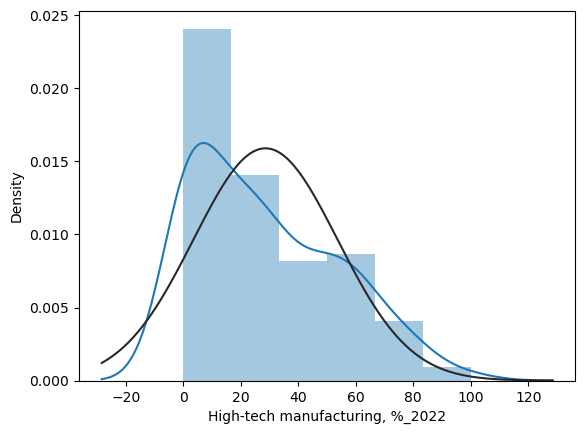

In [32]:
sns.distplot(df['High-tech manufacturing, %_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

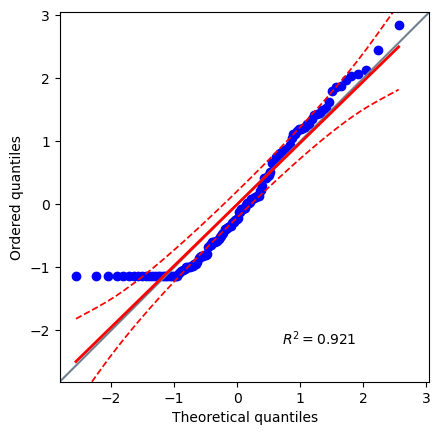

In [33]:
pg.qqplot(df['High-tech manufacturing, %_2022'], dist = 'norm')

_Conclusion: the distribution of High-tech manufacturing, % 2022 is different from normal_

**Government effectiveness_2022**

In [34]:
stats.kstest(df['Government effectiveness_2022'].dropna(), 'norm', 
             args=(df['Government effectiveness_2022'].dropna().mean(), 
                   df['Government effectiveness_2022'].dropna().std()))

KstestResult(statistic=0.0793056239165289, pvalue=0.35864047824821477, statistic_location=53.0, statistic_sign=1)

<Axes: xlabel='Government effectiveness_2022', ylabel='Density'>

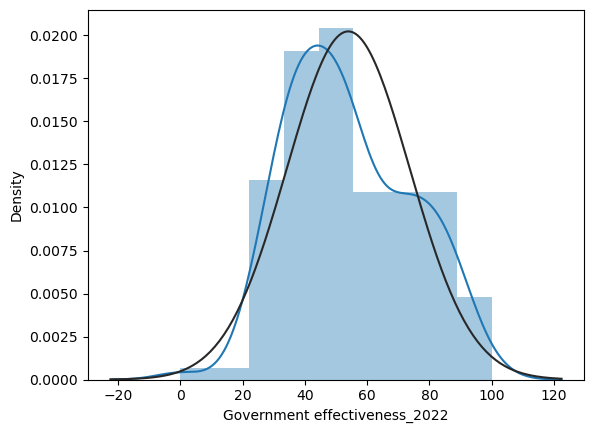

In [35]:
sns.distplot(df['Government effectiveness_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

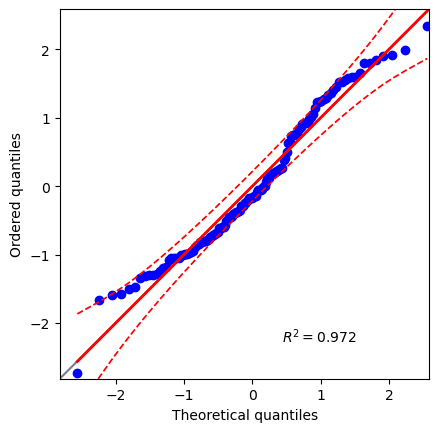

In [36]:
pg.qqplot(df['Government effectiveness_2022'], dist = 'norm')

_Conclusion: the distribution of Government effectiveness_2022 is not different from normal_

**Business environment_2022**

In [37]:
stats.kstest(df['Business environment_2022'].dropna(), 'norm', 
             args=(df['Business environment_2022'].dropna().mean(), 
                   df['Business environment_2022'].dropna().std()))

KstestResult(statistic=0.042580660762039146, pvalue=0.9621605872389752, statistic_location=56.7, statistic_sign=1)

<Axes: xlabel='Business environment_2022', ylabel='Density'>

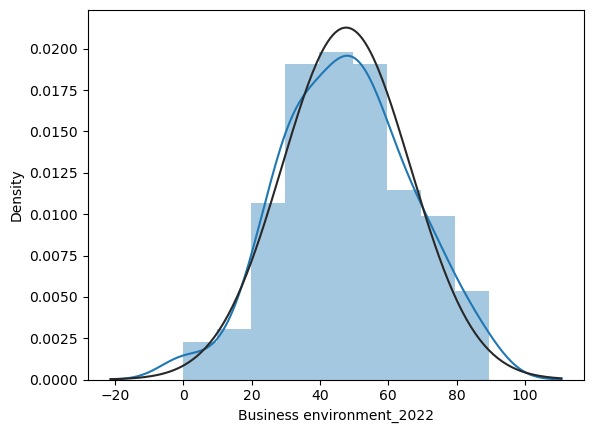

In [38]:
sns.distplot(df['Business environment_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

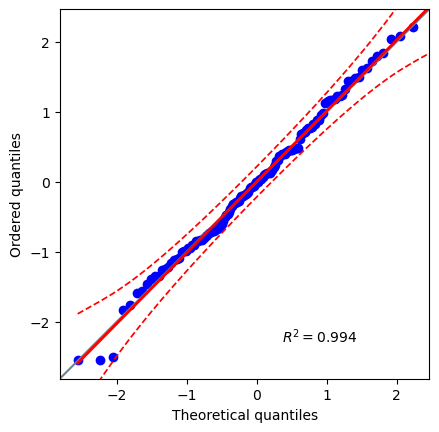

In [39]:
pg.qqplot(df['Business environment_2022'], dist = 'norm')

_Conclusion: the distribution of Business environment_2022 is not different from normal_

**Creative goods and services_2022**

In [40]:
stats.kstest(df['Creative goods and services_2022'].dropna(), 'norm', 
             args=(df['Creative goods and services_2022'].dropna().mean(), 
                   df['Creative goods and services_2022'].dropna().std()))

KstestResult(statistic=0.1059332353284872, pvalue=0.09606350812447681, statistic_location=7.9, statistic_sign=1)

<Axes: xlabel='Creative goods and services_2022', ylabel='Density'>

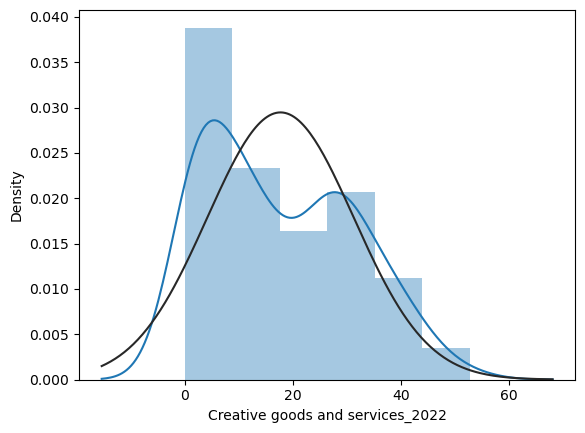

In [41]:
sns.distplot(df['Creative goods and services_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

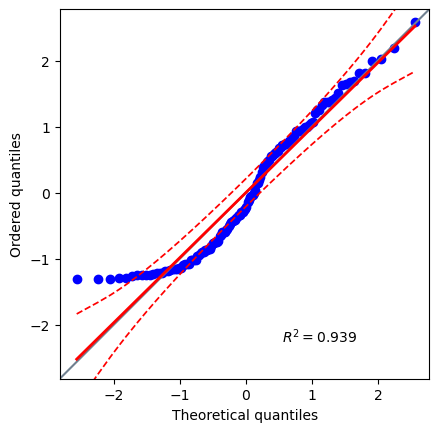

In [42]:
pg.qqplot(df['Creative goods and services_2022'], dist = 'norm')

_Conclusion: the distribution of Creative goods and services_2022 is not different from normal_

We have analyzed the distribution of several variables. Four of them have the distributions, that are not significantly different from normal distribution the other variables have the distributions, that are significantly different from normal distribution.

## 4. Pairwise Correlation <a class="anchor" id="chapter4"></a>

### Pearson correlation coefficient

In the table below Pearson correlation coefficient is calculated for all possible pairs of quantitative variables. This is __not a good solution__ as for several pairs of variables the Pearson correlation coefficient is not applicable.

In [43]:
df.corr(numeric_only=True) 

,Business environment_2020,Business environment_2021,Business environment_2022,Business sophistication index_2020,Business sophistication index_2021,Business sophistication index_2022,Citable documents H-index_2020,Citable documents H-index_2021,Citable documents H-index_2022,Creative goods and services_2020,...,"Tertiary enrolment, % gross_2021","Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2020,University-industry R&D collaboration_2021,University-industry R&D collaboration_2022,Euro area,European Union,OECD members,Least developed countries,High income
Business environment_2020,1.000000,1.000000,0.374400,0.645183,0.652948,0.686277,0.613813,0.613944,0.606913,0.472930,...,0.577426,0.543785,0.485420,0.498880,0.516637,0.346680,0.401291,0.594219,-0.394077,0.565094
Business environment_2021,1.000000,1.000000,0.381639,0.645183,0.656416,0.690642,0.613813,0.614306,0.607441,0.472930,...,0.583946,0.551974,0.485420,0.514098,0.532889,0.346186,0.400942,0.591192,-0.419708,0.565326
Business environment_2022,0.374400,0.381639,1.000000,0.500275,0.502070,0.523083,0.360508,0.368032,0.376547,0.463312,...,0.241300,0.273803,0.648155,0.685761,0.759305,0.153601,0.104429,0.315914,-0.198400,0.420853
Business sophistication index_2020,0.645183,0.645183,0.500275,1.000000,0.990146,0.976785,0.764934,0.766761,0.765421,0.728315,...,0.596799,0.556469,0.747689,0.745958,0.719563,0.406886,0.486120,0.688329,-0.376083,0.677409
Business sophistication index_2021,0.652948,0.656416,0.502070,0.990146,1.000000,0.983350,0.767656,0.770736,0.769207,0.737732,...,0.615734,0.578060,0.732183,0.742292,0.716682,0.422518,0.496682,0.697299,-0.411743,0.666980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Euro area,0.346680,0.346186,0.153601,0.406886,0.422518,0.449959,0.306666,0.307489,0.307628,0.337721,...,0.413153,0.410609,0.259445,0.267817,0.236539,1.000000,0.834966,0.530387,-0.196648,0.530273
European Union,0.401291,0.400942,0.104429,0.486120,0.496682,0.528001,0.355093,0.356811,0.356881,0.423584,...,0.450987,0.450607,0.289466,0.297090,0.274629,0.834966,1.000000,0.596459,-0.235516,0.597503
OECD members,0.594219,0.591192,0.315914,0.688329,0.697299,0.710892,0.687717,0.688251,0.684447,0.553040,...,0.598500,0.568779,0.517930,0.531768,0.498992,0.530387,0.596459,1.000000,-0.294224,0.659962
Least developed countries,-0.394077,-0.419708,-0.198400,-0.376083,-0.411743,-0.460060,-0.294624,-0.306719,-0.328444,-0.372494,...,-0.553622,-0.558450,-0.320976,-0.338004,-0.344103,-0.196648,-0.235516,-0.294224,1.000000,-0.370842


Pearson correlation coefficient can be calculated to evaluate the relationship between interval variables with distributions that are not significantly different from normal.

In [44]:
df['University-industry R&D collaboration_2022'].corr(df['Government effectiveness_2022']) 

0.7354650445262583

There is a strong positive correlation between the variables.

<Axes: xlabel='University-industry R&D collaboration_2022', ylabel='Government effectiveness_2022'>

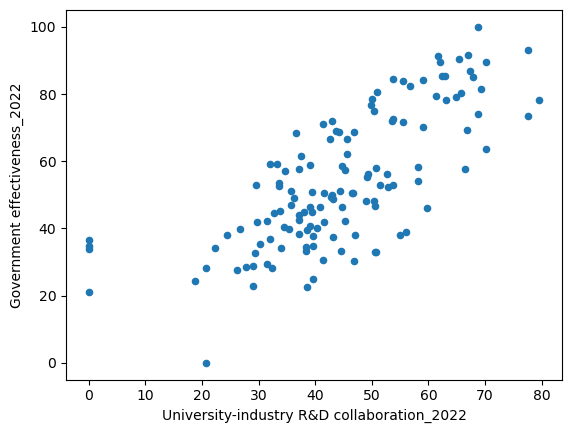

In [45]:
df.plot('University-industry R&D collaboration_2022', 'Government effectiveness_2022', kind='scatter')

Pearson correlation coefficient between University-industry R&D collaboration_2022 and 3 other variables, that are normally distributed.

In [46]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022']].corrwith(df['University-industry R&D collaboration_2022'])

Creative goods and services_2022    0.544774
Business environment_2022           0.759305
Government effectiveness_2022       0.735465
dtype: float64

Correlation coefficients sorted in ascending order.

In [47]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022']].corrwith(df['University-industry R&D collaboration_2022']).sort_values()

Creative goods and services_2022    0.544774
Government effectiveness_2022       0.735465
Business environment_2022           0.759305
dtype: float64

Correlation matrix based on 4 variables.

In [48]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr()

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.000000,0.400947,0.687971,0.544774
Business environment_2022,0.400947,1.000000,0.674534,0.759305
Government effectiveness_2022,0.687971,0.674534,1.000000,0.735465
University-industry R&D collaboration_2022,0.544774,0.759305,0.735465,1.000000


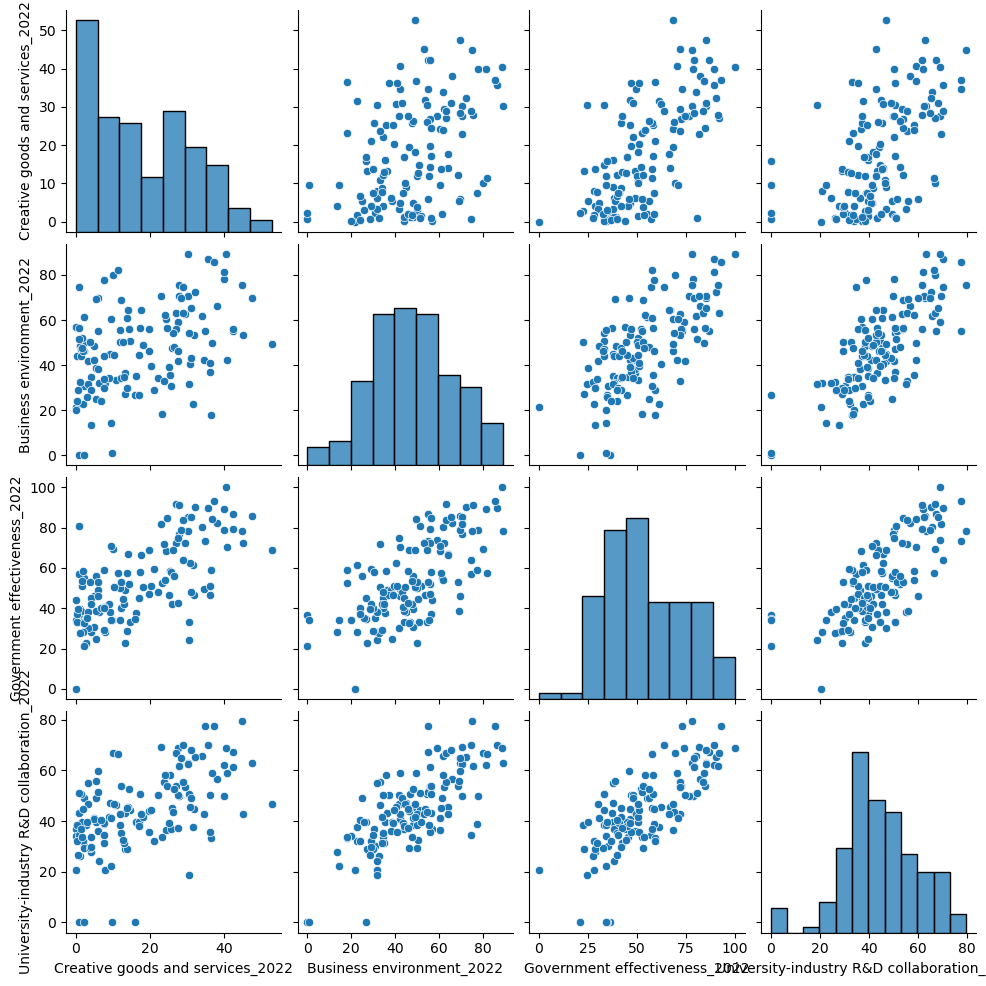

In [49]:
sns.pairplot(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']]) #scatterplot matrix

We can show the results as Series using `stack()`.

In [50]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 
    'University-industry R&D collaboration_2022']].corr().stack()

Creative goods and services_2022            Creative goods and services_2022              1.000000
                                            Business environment_2022                     0.400947
                                            Government effectiveness_2022                 0.687971
                                            University-industry R&D collaboration_2022    0.544774
Business environment_2022                   Creative goods and services_2022              0.400947
                                            Business environment_2022                     1.000000
                                            Government effectiveness_2022                 0.674534
                                            University-industry R&D collaboration_2022    0.759305
Government effectiveness_2022               Creative goods and services_2022              0.687971
                                            Business environment_2022                     0.674534
          

We can show the results as Series and sort them.

In [51]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 
    'University-industry R&D collaboration_2022']].corr().stack().sort_values()

Creative goods and services_2022            Business environment_2022                     0.400947
Business environment_2022                   Creative goods and services_2022              0.400947
Creative goods and services_2022            University-industry R&D collaboration_2022    0.544774
University-industry R&D collaboration_2022  Creative goods and services_2022              0.544774
Business environment_2022                   Government effectiveness_2022                 0.674534
Government effectiveness_2022               Business environment_2022                     0.674534
Creative goods and services_2022            Government effectiveness_2022                 0.687971
Government effectiveness_2022               Creative goods and services_2022              0.687971
                                            University-industry R&D collaboration_2022    0.735465
University-industry R&D collaboration_2022  Government effectiveness_2022                 0.735465
Business e

### Pearson correlation coefficient

In [52]:
stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())

PearsonRResult(statistic=0.7593053875329312, pvalue=5.056226771673954e-26)

In [53]:
print("Pearson's r:", stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), 
                                     df['Business environment_2022'].dropna())[0], 
       '    p-value:', stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), 
                                      df['Business environment_2022'].dropna())[1])

Pearson's r: 0.7593053875329312     p-value: 5.056226771673954e-26


These two variables are scale variables; their distributions are not different from normal. Therefore, to evaluate the relationship between them we can calculate Pearson correlation coefficient.

H1: There is a relationship between University-industry R&D collaboration and Business environment in 2022 (r != 0)

H0: There is no relationship between University-industry R&D collaboration and Business environment  (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted, H0 is rejected.
2. Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.
3. Strength of relationship: the correlation coefficient is 0.76, therefore, there is a strong correlation between the variables.

Text(0.5, 1.0, 'Pearson correlation')

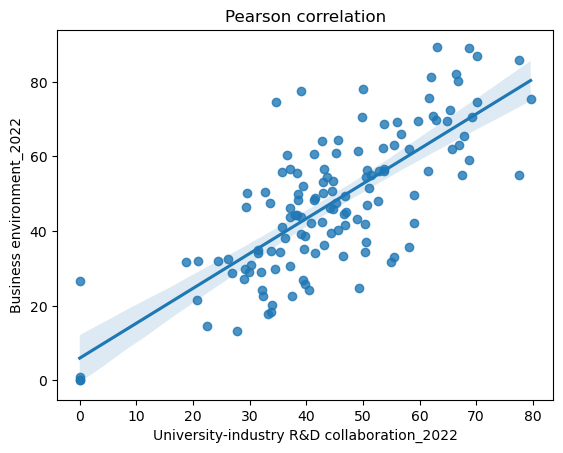

In [54]:
sns.regplot(df, x = 'University-industry R&D collaboration_2022', 
            y = 'Business environment_2022').set_title('Pearson correlation')

### Spearman correlation coefficient

In [55]:
df1 = df.dropna(subset=['Information and Communications Technology use_2022', 'High-tech manufacturing, %_2022'])
stats.spearmanr(df1['Information and Communications Technology use_2022'], df1['High-tech manufacturing, %_2022'])

SignificanceResult(statistic=0.6749691181222638, pvalue=7.023352609224242e-19)

These two variables are scale variables, but their distributions are different from normal. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As the values of each variable are mostly unique, and when we rank them we will get no or small number of tied ranks, the Spearman correlation is appropriate.

H1: There is a relationship between Information and Communications Technology use and High-tech manufacturing in 2022 (r != 0)

H0: There is no relationship between Information and Communications Technology use and High-tech manufacturing (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted, H0 is rejected.
2. Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.
3. Strength of relationship: the correlation coefficient is 0.67, therefore, there is a medium correlation between the variables.

We can create Spearman correlation matrix.

In [56]:
df[['Information and Communications Technology use_2022',
    'High-tech manufacturing, %_2022','University-industry R&D collaboration_2022']].corr('spearman') 

,Information and Communications Technology use_2022,"High-tech manufacturing, %_2022",University-industry R&D collaboration_2022
Information and Communications Technology use_2022,1.000000,0.674969,0.616121
"High-tech manufacturing, %_2022",0.674969,1.000000,0.544839
University-industry R&D collaboration_2022,0.616121,0.544839,1.000000


<Axes: xlabel='Information and Communications Technology use_2022', ylabel='High-tech manufacturing, %_2022'>

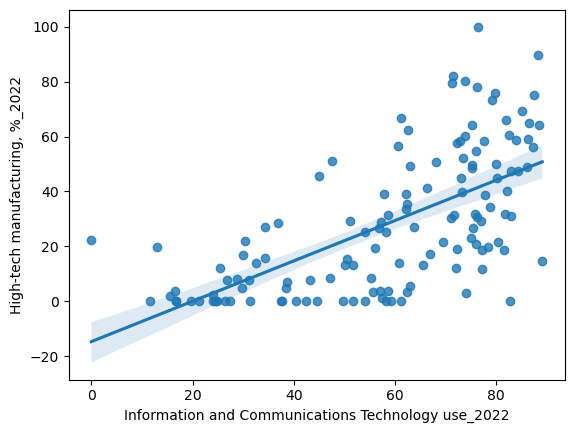

In [57]:
sns.regplot(data = df, x = 'Information and Communications Technology use_2022',
            y = 'High-tech manufacturing, %_2022')

### Kendall correlation coefficient

In [58]:
df = pd.read_excel('WIPO-GII.xlsx')
df['Income'].value_counts()

Income
middle income    72
high income      52
low income       15
Name: count, dtype: int64

In [59]:
#pd.set_option('future.no_silent_downcasting', True)

We transform Income from string to int.

In [60]:
df['Income']=df['Income'].replace('low income', 1)
df['Income']=df['Income'].replace('middle income', 2)
df['Income']=df['Income'].replace('high income', 3)
df['Income'].value_counts()


Income
2    72
3    52
1    15
Name: count, dtype: int64

In [61]:
df1 = df.dropna(subset=['Income', 'University-industry R&D collaboration_2022'])
stats.kendalltau(df1.Income, df1['University-industry R&D collaboration_2022'])

SignificanceResult(statistic=0.43833419909418553, pvalue=2.4846308818292997e-10)

University-industry R&D collaboration_2022 is a scale variable, it's distribution is different from normal. Income is a categorical variable with ordinal scale of measurement. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As most of the values of Income value are not unique, and when we rank them, we will receive many tied ranks, the Kendall correlation is appropriate.

H1: There is a relationship between Income and University-industry R&D collaboration in 2022 (r != 0)

H0: There is no relationship between Income and University-industry R&D collaboration in 2022 (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted, H0 is rejected.
2. Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.
3. Strength of relationship: the correlation coefficient is 0.43, therefore, there is a weak correlation between the variables.


We can create Kendall correlation matrix.

In [62]:
df[['Income','University-industry R&D collaboration_2022',
    'Information and Communications Technology use_2022']].corr('kendall') 

,Income,University-industry R&D collaboration_2022,Information and Communications Technology use_2022
Income,1.000000,0.438334,0.717396
University-industry R&D collaboration_2022,0.438334,1.000000,0.437374
Information and Communications Technology use_2022,0.717396,0.437374,1.000000


### Point-biserial correlation

In [63]:
df = pd.read_excel('WIPO-GII.xlsx')

In [64]:
df_clean = df.dropna(subset=['University-industry R&D collaboration_2022', 'High income'])
pb, pval = pointbiserialr(df_clean['University-industry R&D collaboration_2022'], df_clean['High income'])
print(f'Point-biserial correlation: {np.round(pb, 4)}, pvalue = {np.round(pval, 4)}')

Point-biserial correlation: 0.5275, pvalue = 0.0


Text(0.5, 1.0, 'Point-biserial correlation')

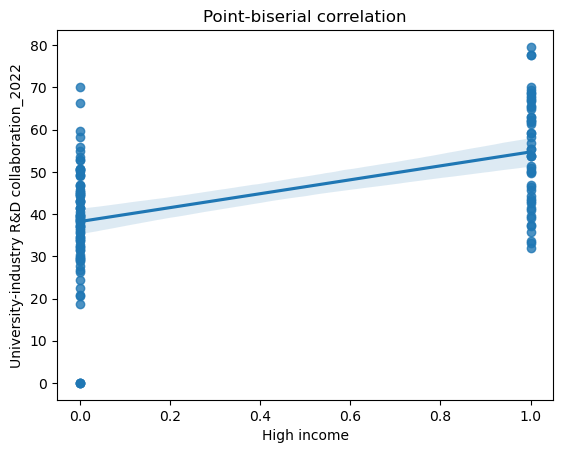

In [65]:
sns.regplot(data = df_clean, x = 'High income', y = 'University-industry R&D collaboration_2022').set_title('Point-biserial correlation')

_Conclusion: There is a statistically significant positive medium correlation._

### Phi correlation

In [66]:
def phi_corrrelation(data: pd.DataFrame, x: str, y: str):
    chi = pd.crosstab(index=data[x], 
                           columns=data[y], margins = True).values
    phi = (chi[0, 0] * chi[1, 1] - chi[1, 0] * chi[0, 1]) / np.sqrt(chi[1, 2] * chi[2, 1] * chi[2, 0] * chi[0, 2])
    return phi

In [67]:
phi_corrrelation(df, 'High income', 'Least developed countries')

-0.3708424979352351

_Conclusion: There is a negative weak correlation._

## 5. Partial Correlation <a class="anchor" id="chapter5"></a>

Let's calculate a correlation between University-industry R&D collaboration and Business environment in 2022.

In [68]:
stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())

PearsonRResult(statistic=0.7593053875329312, pvalue=5.056226771673954e-26)

Now let's control for the effect of High-tech manufacturing, %_2022

In [69]:
df = df.dropna(subset=['High-tech manufacturing, %_2022', 'University-industry R&D collaboration_2022', 'Business environment_2022'])
r_xy = stats.pearsonr(df['University-industry R&D collaboration_2022'], df['Business environment_2022'])[0]
r_xz = stats.pearsonr(df['University-industry R&D collaboration_2022'], df['High-tech manufacturing, %_2022'])[0]
r_yz = stats.pearsonr(df['Business environment_2022'], df['High-tech manufacturing, %_2022'])[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print('Paired correlation coefficient between  University-industry R&D collaboration and Business environment in 2022: ',r_xy)
print('Partial correlation coefficient between  University-industry R&D collaboration and Business environment in 2022, controlling for the effect of High-tech manufacturing: ',r_xy_z)

Paired correlation coefficient between  University-industry R&D collaboration and Business environment in 2022:  0.7593053875329312
Partial correlation coefficient between  University-industry R&D collaboration and Business environment in 2022, controlling for the effect of High-tech manufacturing:  0.7454224834023446


We can also use pingouin module.

In [70]:
pg.partial_corr(data=df, x='University-industry R&D collaboration_2022', 
                y='Business environment_2022', covar='High-tech manufacturing, %_2022') 

,n,r,CI95%,p-val
pearson,132,0.745422,"[0.66, 0.81]",1.773242e-24


In [71]:
pg.partial_corr(data=df, x='Business environment_2022', 
                y='University-industry R&D collaboration_2022', covar='High-tech manufacturing, %_2022', method = 'spearman')

,n,r,CI95%,p-val
spearman,132,0.702864,"[0.6, 0.78]",8.172177e-21


We can conclude that the correlation between University-industry R&D collaboration and Business environment did not change significantly after controlling for High-tech manufacturing.

Let’s look at the results of the research which studies the  attitude of the Germans to foreign workers. There are 3 variables in the database:

1) Age;
2) Attitude to foreign workers (from 0 to 30, the higher the value, the more negative is the attitude);
3) Frequency of visiting a church (1 – never, 6 – at least 2 times per week). 

In [72]:
df1 = pd.read_stata('partial.dta')
df1

,age,church,newcomer
0,56,4,17
1,80,5,16
2,64,4,19
3,65,5,19
4,48,3,17
5,41,3,14
6,44,4,21
7,43,2,16
8,57,4,17
9,62,5,18


Let's calculate a paired correlation coefficient between church and newcomer

In [73]:
stats.kendalltau(df1.church, df1.newcomer)

SignificanceResult(statistic=0.413158691042416, pvalue=0.0020961003342962674)

Сorrelation is statically significant, positive and weak. It means that the more frequently a person visits the church, the more negative is his/her attitude towards foreign workers, which is rather strange result. Let's control the correlation for the age variable.

In [74]:
pg.partial_corr(data=df1, x='church', y='newcomer', covar='age')

,n,r,CI95%,p-val
pearson,35,0.12149,"[-0.23, 0.44]",0.493692


The correlation now in not statistically significant. Most likely, a negative attitude is more inherent to older people, but they also visit church more frequently.

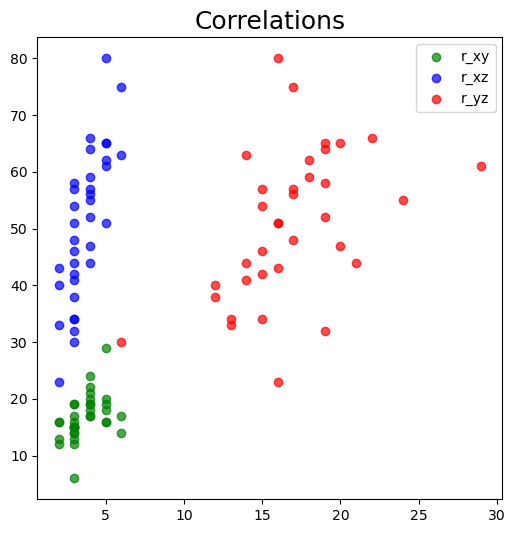

In [75]:
plt.figure(figsize=(6, 6))
plt.scatter(df1.church, df1.newcomer, c='g', alpha=0.7, label='r_xy')
plt.scatter(df1.church, df1.age, c='b', alpha=0.7, label='r_xz')
plt.scatter(df1.newcomer, df1.age, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

## 6. Visualization of Correlations <a class="anchor" id="chapter6"></a>

In [76]:
corr = df[['Creative goods and services_2022',
           'Business environment_2022',
           'Government effectiveness_2022', 
           'University-industry R&D collaboration_2022']].dropna().corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.000000,0.400947,0.687971,0.544774
Business environment_2022,0.400947,1.000000,0.674534,0.759305
Government effectiveness_2022,0.687971,0.674534,1.000000,0.735465
University-industry R&D collaboration_2022,0.544774,0.759305,0.735465,1.000000


<Axes: >

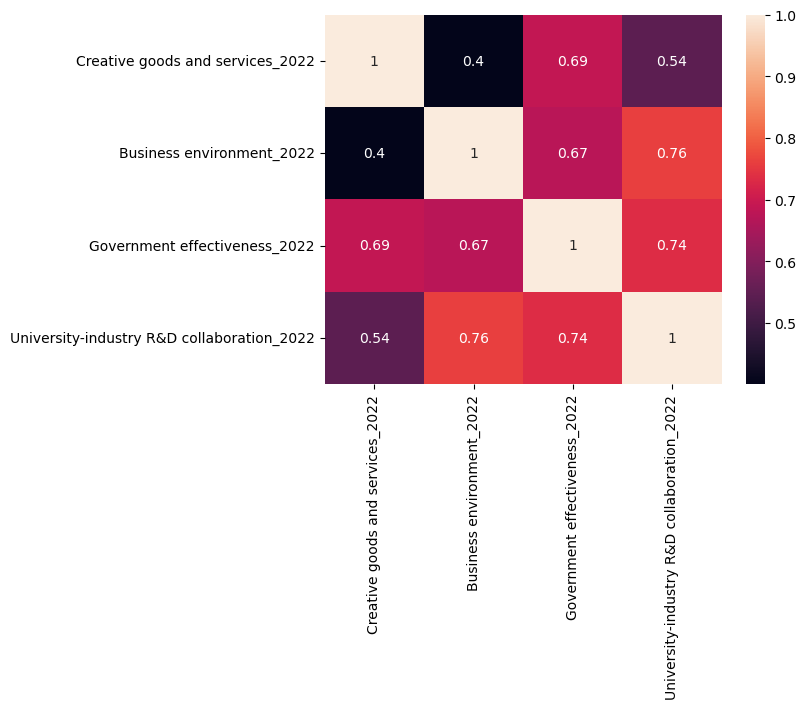

In [77]:
sns.heatmap(df[['Creative goods and services_2022',
                'Business environment_2022',
                'Government effectiveness_2022', 
                'University-industry R&D collaboration_2022']]
            .corr(), annot=True)

<Axes: >

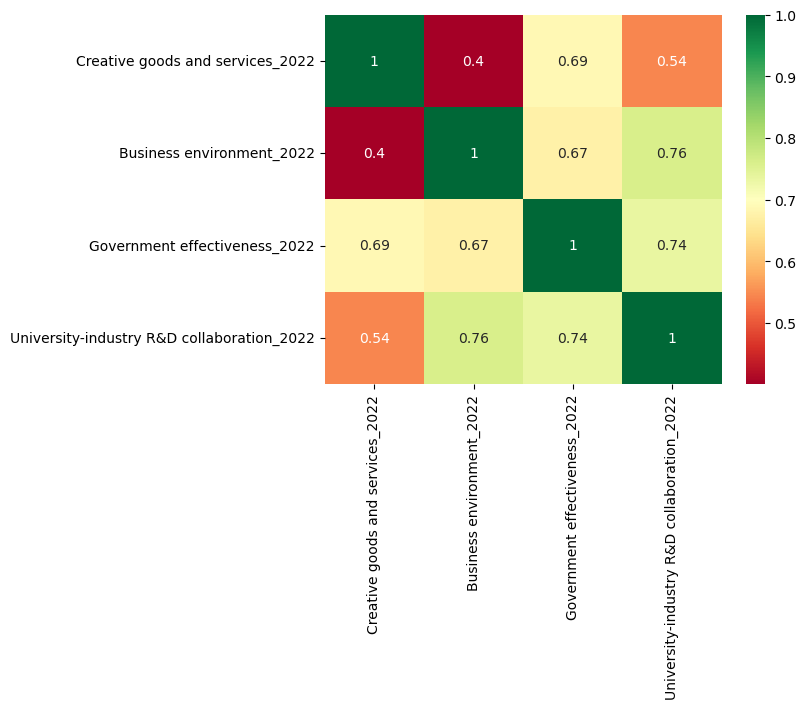

In [78]:
sns.heatmap(df[['Creative goods and services_2022',
                'Business environment_2022',
                'Government effectiveness_2022', 
                'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn')

<Axes: >

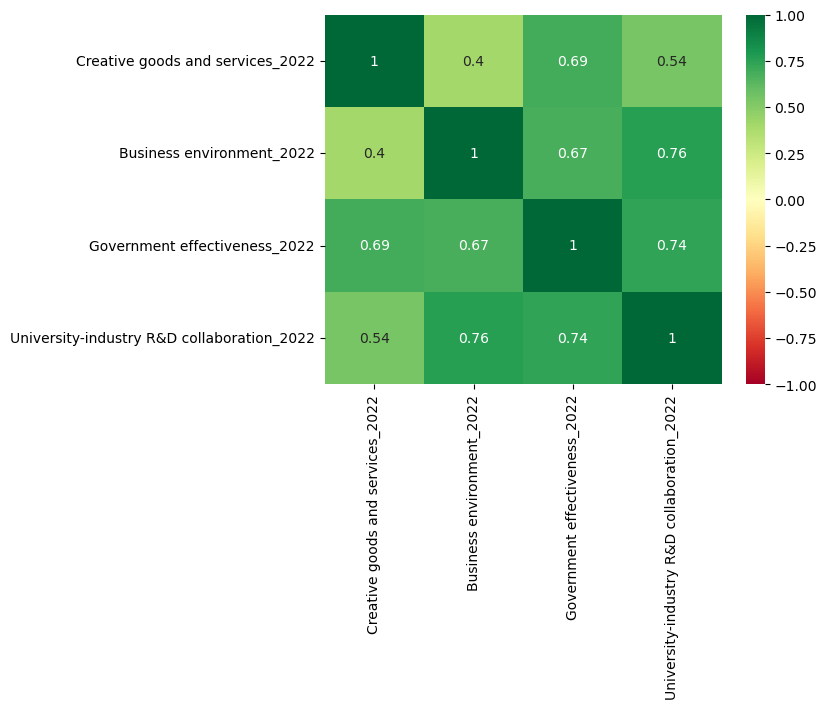

In [79]:
sns.heatmap(df[['Creative goods and services_2022',
                'Business environment_2022',
                'Government effectiveness_2022', 
                'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 

<Axes: >

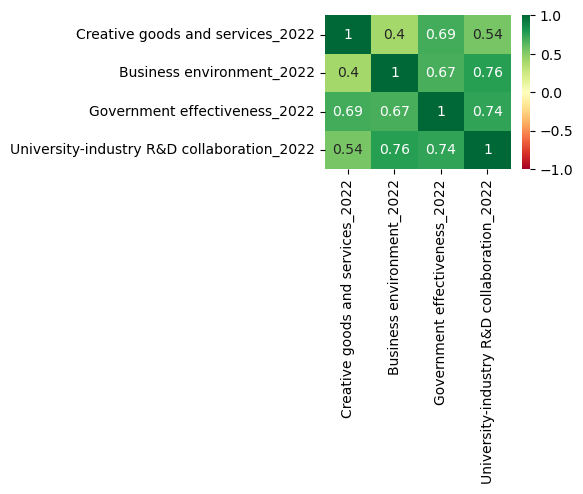

In [80]:
plt.figure(figsize=(3,2))
sns.heatmap(df[['Creative goods and services_2022',
                'Business environment_2022',
                'Government effectiveness_2022', 
                'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 

In [81]:
df1 = df[['Creative goods and services_2022','Business environment_2022',
          'Government effectiveness_2022', 'University-industry R&D collaboration_2022']]
rho = df1.corr()
pval = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.0***,0.4***,0.69***,0.54***
Business environment_2022,0.4***,1.0***,0.67***,0.76***
Government effectiveness_2022,0.69***,0.67***,1.0***,0.74***
University-industry R&D collaboration_2022,0.54***,0.76***,0.74***,1.0***


Statistical significance is marked with asterisks: * - p < 0.1; ** - p < 0.05; *** - p < 0.01